In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, train_test_split 
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve 
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
death_preds  = pd.read_excel('GOT_character_predictions.xlsx')

In [3]:
death_preds .shape

(1946, 26)

In [4]:
death_preds  = pd.DataFrame(death_preds)

In [5]:
death_preds .columns

Index(['S.No', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'mother',
       'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones',
       'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords',
       'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')

In [6]:
death_preds .head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1739,Imry Florent,Ser,1,NaN,NaN,NaN,NaN,NaN,House Florent,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.183946,0
1,1233,Merianne Frey,NaN,0,NaN,288.0,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,NaN,0,0,17.0,0,0.083612,1
2,998,Dolf,NaN,0,Vale mountain clans,NaN,NaN,NaN,NaN,Stone Crows,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.016722,1
3,64,Quill,NaN,1,Braavosi,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.016722,1
4,334,Bandy,NaN,0,Northmen,NaN,NaN,NaN,NaN,House Stark,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.020067,1


In [7]:
death_preds .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 26 columns):
S.No                          1946 non-null int64
name                          1946 non-null object
title                         938 non-null object
male                          1946 non-null int64
culture                       677 non-null object
dateOfBirth                   433 non-null float64
mother                        21 non-null object
father                        26 non-null object
heir                          23 non-null object
house                         1519 non-null object
spouse                        276 non-null object
book1_A_Game_Of_Thrones       1946 non-null int64
book2_A_Clash_Of_Kings        1946 non-null int64
book3_A_Storm_Of_Swords       1946 non-null int64
book4_A_Feast_For_Crows       1946 non-null int64
book5_A_Dance_with_Dragons    1946 non-null int64
isAliveMother                 21 non-null float64
isAliveFather                 26 non-null f

In [8]:
print ('dataset ({} rows) null value:\n'.format(death_preds .shape[0]))
print (death_preds .isnull().sum(axis = 0))

dataset (1946 rows) null value:

S.No                             0
name                             0
title                         1008
male                             0
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64


In [9]:
## mean age
print(death_preds['age'].mean())

-1293.5635103926097


In [10]:
## Check which characters have a negative age and it's value.
print(death_preds['name'][death_preds['age']< 0])
print(death_preds['age'][death_preds['age']< 0])

110     Rhaego
1350    Doreah
Name: name, dtype: object
110    -298001.0
1350   -277980.0
Name: age, dtype: float64


## According the research, Rhaego's age is 0, Doreah is 25

In [11]:
## Replace negative age
death_preds.loc[110, 'age'] = 0.0
death_preds.loc[1350, 'age'] = 25.0

In [12]:
death_preds['age'].mean()

36.70438799076212

## Fill NA

In [13]:
# Fill the nans 
death_preds["age"].fillna(death_preds["age"].mean(), inplace=True)
death_preds["culture"].fillna("", inplace=True)

In [14]:
# Get all of the culture values in our dataset
set(death_preds['culture'])

{'',
 'Andal',
 'Andals',
 'Asshai',
 "Asshai'i",
 'Astapor',
 'Astapori',
 'Braavos',
 'Braavosi',
 'Crannogmen',
 'Dorne',
 'Dornish',
 'Dornishmen',
 'Dothraki',
 'First Men',
 'Free Folk',
 'Free folk',
 'Ghiscari',
 'Ghiscaricari',
 'Ibbenese',
 'Ironborn',
 'Ironmen',
 'Lhazareen',
 'Lhazarene',
 'Lysene',
 'Lyseni',
 'Meereen',
 'Meereenese',
 'Myrish',
 'Naathi',
 'Northern mountain clans',
 'Northmen',
 'Norvos',
 'Norvoshi',
 'Pentoshi',
 'Qarth',
 'Qartheen',
 'Qohor',
 'Reach',
 'Reachmen',
 'Rhoynar',
 'Riverlands',
 'Rivermen',
 'Sistermen',
 'Stormlander',
 'Stormlands',
 'Summer Islander',
 'Summer Islands',
 'Summer Isles',
 'The Reach',
 'Tyroshi',
 'Vale',
 'Vale mountain clans',
 'Valemen',
 'Valyrian',
 'Westerlands',
 'Westerman',
 'Westermen',
 'Westeros',
 'Wildling',
 'Wildlings',
 'free folk',
 'ironborn',
 'northmen',
 'westermen'}

In [15]:
## culture split and combine
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Andal': ['andal', 'andals'],
    'Lysene': ['lysene', 'lyseni'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Vale': ['vale', 'valemen', 'vale mountain clans'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Mereen': ['meereen', 'meereenese'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Qartheen': ['qartheen', 'qarth'],
    'Ironborn': ['ironborn', 'ironmen'],
    'RiverLands': ['riverlands', 'rivermen']
}

In [16]:
def combine_culture(value):
    value = value.lower()
    i = [j for (j, i) in cult.items() if value in i]
    return i[0] if len(i) > 0 else value.title()
death_preds.loc[:, "culture"] = [combine_culture(x) for x in death_preds["culture"]]

In [17]:
## fill missing value
death_preds.loc[:, "title"] = pd.factorize(death_preds.title)[0]
death_preds.loc[:, "culture"] = pd.factorize(death_preds.culture)[0]
death_preds.loc[:, "mother"] = pd.factorize(death_preds.mother)[0]
death_preds.loc[:, "father"] = pd.factorize(death_preds.father)[0]
death_preds.loc[:, "heir"] = pd.factorize(death_preds.heir)[0]
death_preds.loc[:, "house"] = pd.factorize(death_preds.house)[0]
death_preds.loc[:, "spouse"] = pd.factorize(death_preds.spouse)[0]

In [18]:
death_preds.fillna(value = -1, inplace = True)

In [19]:
## feature engineer
death_preds.drop(["name","dateOfBirth","S.No"], 1, inplace = True)
death_preds.columns = map(lambda x: x.replace(".", "").replace("_", ""), death_preds.columns)

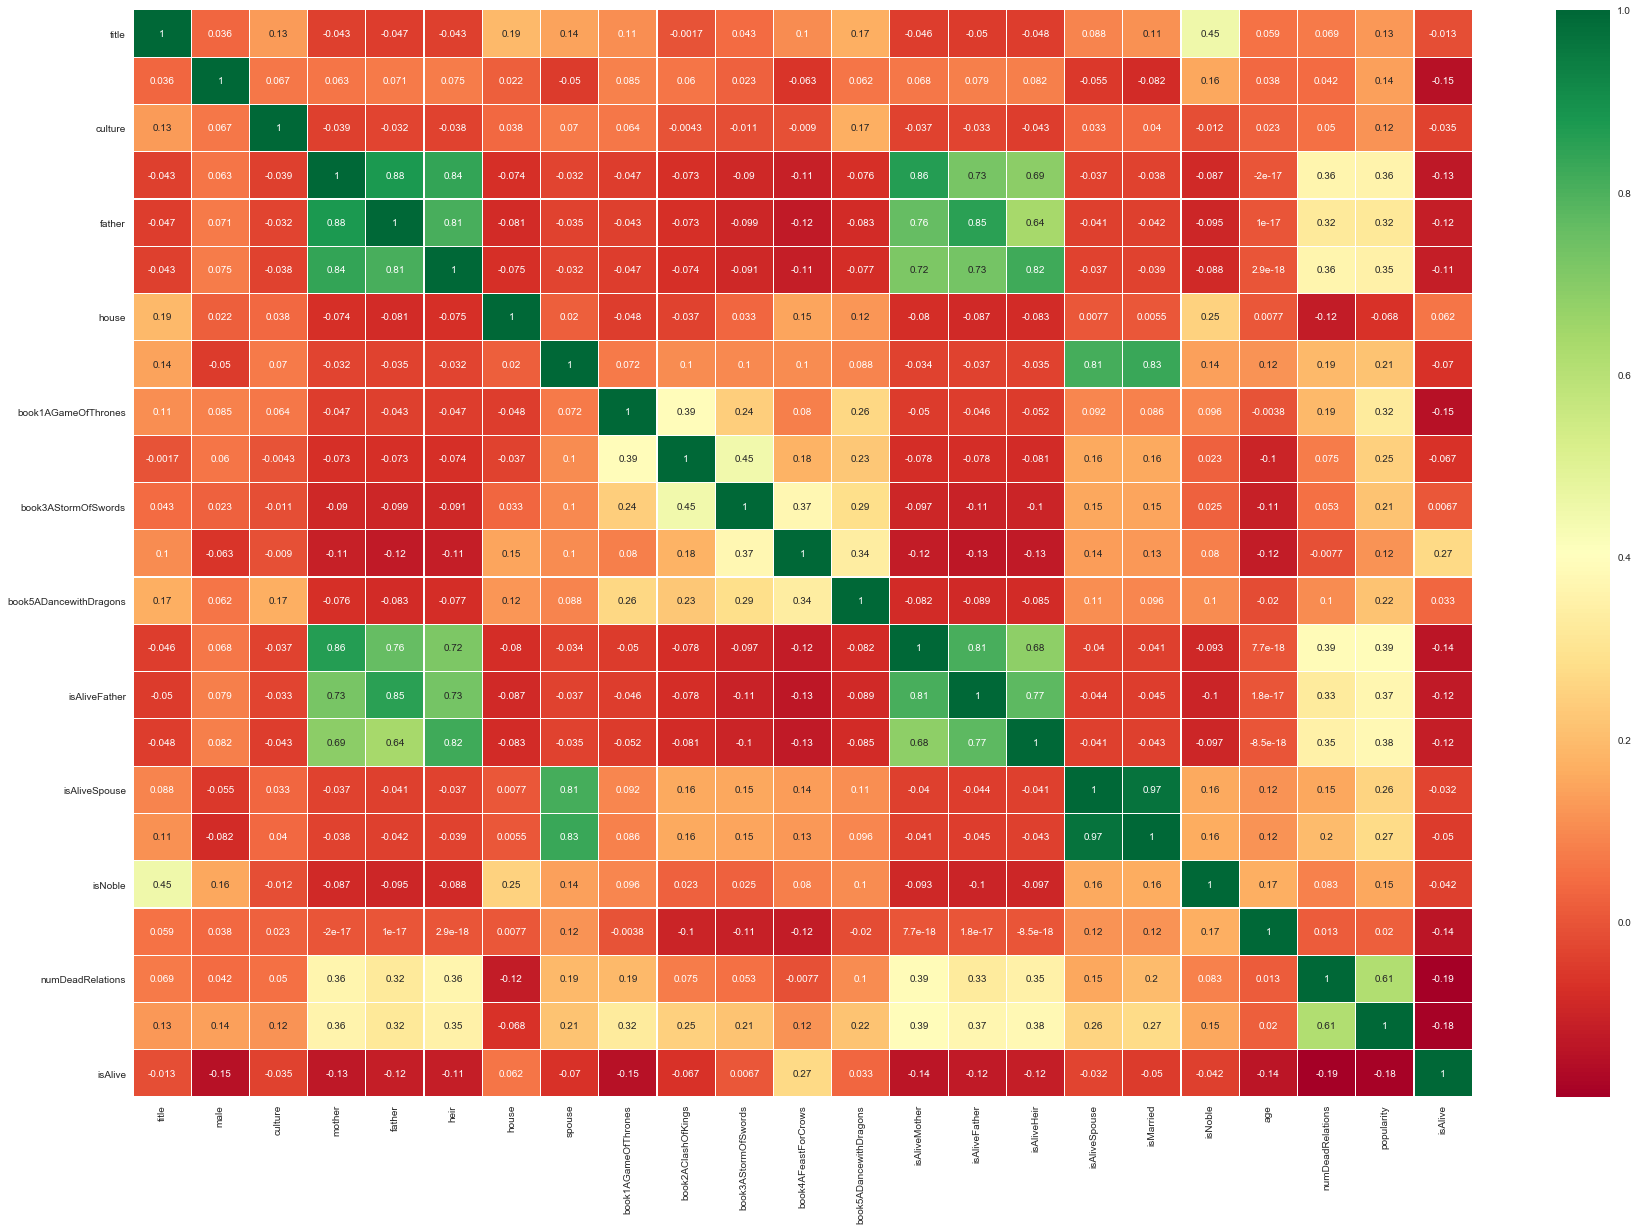

In [20]:
## Corr visualization
sns.heatmap(death_preds.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(30,20)
plt.show()

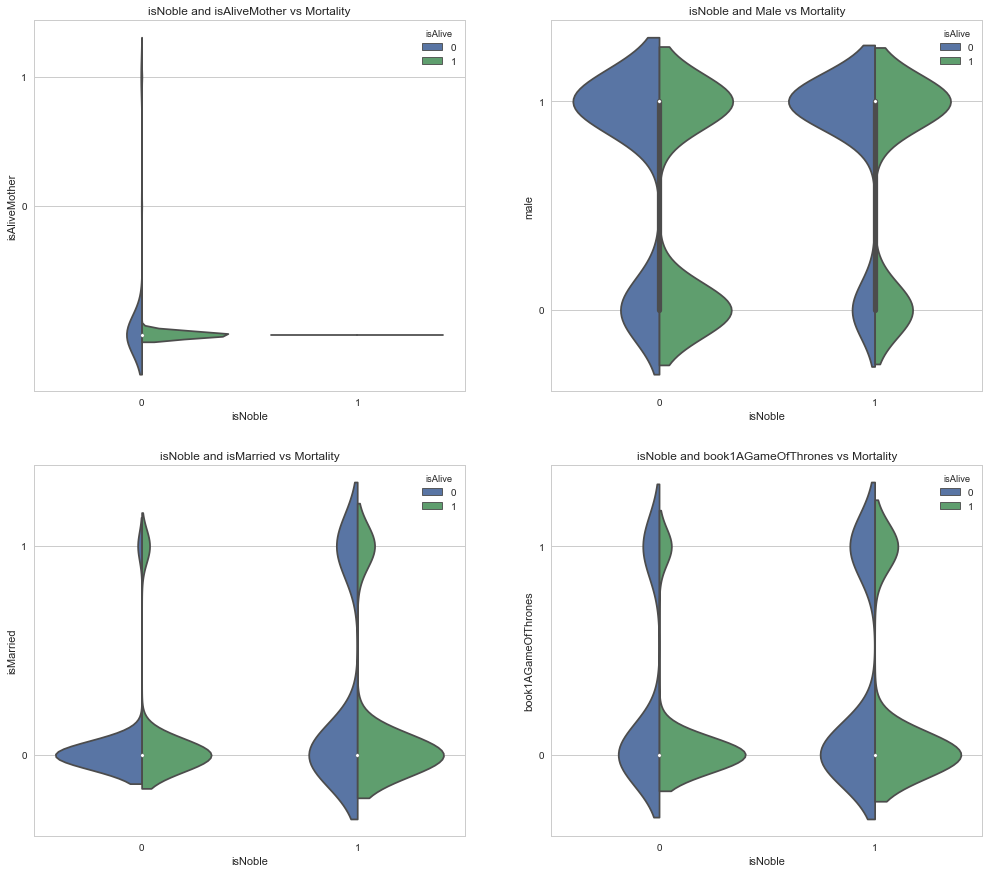

In [21]:
f,ax=plt.subplots(2,2,figsize=(17,15))
sns.violinplot("isNoble", "isAliveMother", hue="isAlive", data=death_preds ,split=True, ax=ax[0, 0])
ax[0, 0].set_title('isNoble and isAliveMother vs Mortality')
ax[0, 0].set_yticks(range(2))

sns.violinplot("isNoble", "male", hue="isAlive", data=death_preds ,split=True, ax=ax[0, 1])
ax[0, 1].set_title('isNoble and Male vs Mortality')
ax[0, 1].set_yticks(range(2))

sns.violinplot("isNoble", "isMarried", hue="isAlive", data=death_preds ,split=True, ax=ax[1, 0])
ax[1, 0].set_title('isNoble and isMarried vs Mortality')
ax[1, 0].set_yticks(range(2))


sns.violinplot("isNoble", "book1AGameOfThrones", hue="isAlive", data=death_preds ,split=True, ax=ax[1, 1])
ax[1, 1].set_title('isNoble and book1AGameOfThrones vs Mortality')
ax[1, 1].set_yticks(range(2))

plt.show()

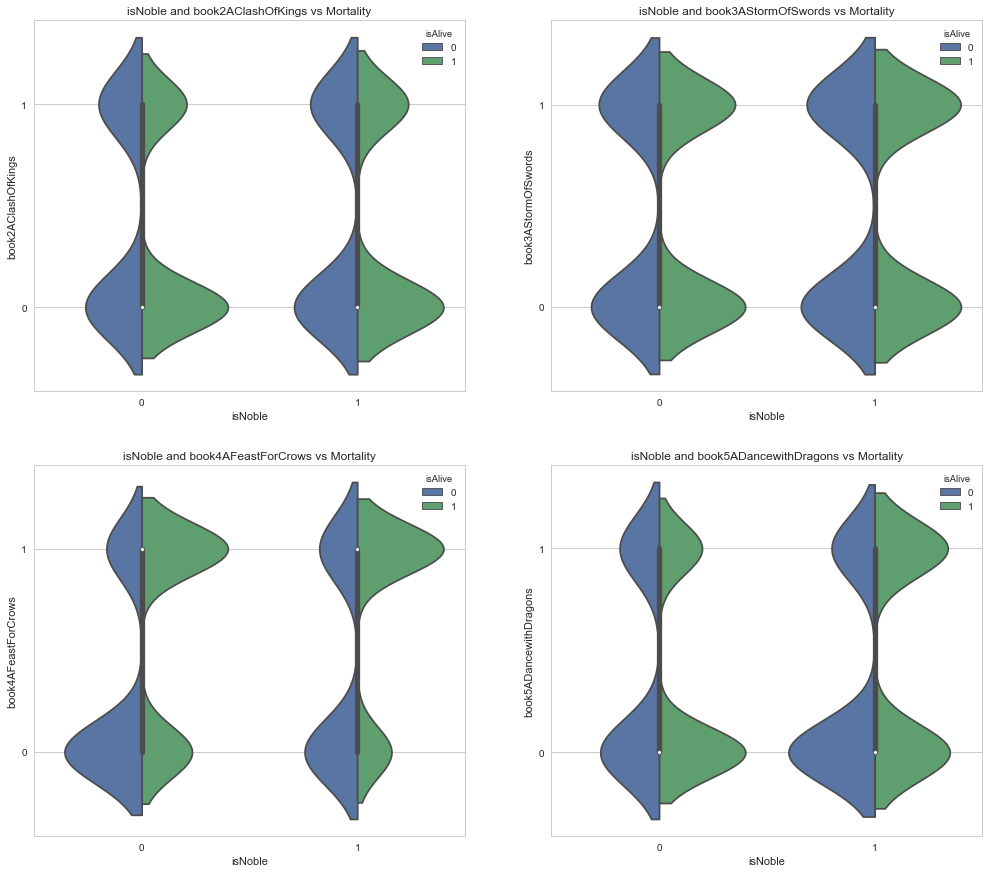

In [22]:
f,ax=plt.subplots(2,2,figsize=(17,15))
sns.violinplot("isNoble", "book2AClashOfKings", hue="isAlive", data=death_preds ,split=True, ax=ax[0, 0])
ax[0, 0].set_title('isNoble and book2AClashOfKings vs Mortality')
ax[0, 0].set_yticks(range(2))

sns.violinplot("isNoble", "book3AStormOfSwords", hue="isAlive", data=death_preds ,split=True, ax=ax[0, 1])
ax[0, 1].set_title('isNoble and book3AStormOfSwords vs Mortality')
ax[0, 1].set_yticks(range(2))

sns.violinplot("isNoble", "book4AFeastForCrows", hue="isAlive", data=death_preds ,split=True, ax=ax[1, 0])
ax[1, 0].set_title('isNoble and book4AFeastForCrows vs Mortality')
ax[1, 0].set_yticks(range(2))


sns.violinplot("isNoble", "book5ADancewithDragons", hue="isAlive", data=death_preds ,split=True, ax=ax[1, 1])
ax[1, 1].set_title('isNoble and book5ADancewithDragons vs Mortality')
ax[1, 1].set_yticks(range(2))

plt.show()

## GOT modeling

In [23]:
## create dummy variables 
df = pd.get_dummies(death_preds)

In [24]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1:]

In [25]:
from sklearn import datasets
from sklearn.feature_selection import RFE # recursive feature elimination 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [26]:
x.columns

Index(['title', 'male', 'culture', 'mother', 'father', 'heir', 'house',
       'spouse', 'book1AGameOfThrones', 'book2AClashOfKings',
       'book3AStormOfSwords', 'book4AFeastForCrows', 'book5ADancewithDragons',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity'],
      dtype='object')

In [27]:
rfe = RFE(logreg, 16) ##Select the top 15 most important features
rfe = rfe.fit(x, y )
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True  True False False  True  True  True  True
 False  True  True  True  True  True  True False  True  True]
[6 1 5 1 1 1 7 4 1 1 1 1 3 1 1 1 1 1 1 2 1 1]


In [28]:
cols = ['male','mother', 'father', 'heir','book1AGameOfThrones', 'book2AClashOfKings',
       'book3AStormOfSwords', 'book4AFeastForCrows','isAliveMother','isAliveFather', 'isAliveSpouse','isMarried', 'isNoble', 'numDeadRelations','popularity']

In [29]:
X=death_preds[cols]

In [30]:
## Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.487978
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                isAlive   No. Observations:                 1946
Model:                          Logit   Df Residuals:                     1931
Method:                           MLE   Df Model:                           14
Date:                Thu, 14 Mar 2019   Pseudo R-squ.:                  0.1395
Time:                        20:14:39   Log-Likelihood:                -949.61
converged:                       True   LL-Null:                       -1103.5
                                        LLR p-value:                 2.687e-57
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
male                   -0.6235      0.129     -4.852      0.000      -0.875      -0.372
mo

## Logistic Regression Model Fitting

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(),
                                                    test_size=0.1, random_state=508,
                                                    stratify = y)

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_pred = logreg.predict(X_test)

In [34]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [35]:
kfold = model_selection.KFold(n_splits=3, random_state=508)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("3-fold cross validation average accuracy: %.3f" % (results.mean()))

3-fold cross validation average accuracy: 0.764


In [36]:
cv_lr_3 = cross_val_score(logreg, X, y, cv = 3)

print(pd.np.mean(cv_lr_3).round(3))

0.765


In [37]:
## Building Random Forest Model Based on Best Parameters
rf_optimal = RandomForestClassifier(bootstrap = False,
                                    criterion = 'entropy',
                                    min_samples_leaf = 16,
                                    n_estimators = 600,
                                    warm_start = True)



rf_optimal.fit(X_train, y_train)


rf_optimal_pred = rf_optimal.predict(X_test)


print('Training Score', rf_optimal.score(X_train, y_train).round(4))
print('Testing Score:', rf_optimal.score(X_test, y_test).round(4))

Training Score 0.8007
Testing Score: 0.7846


In [38]:
logit_roc_auc = roc_auc_score(y_test, rf_optimal_pred).round(3)

In [39]:
logit_roc_auc

0.6

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_optimal = GradientBoostingClassifier(criterion = 'friedman_mse',
                                      learning_rate = 0.1,
                                      max_depth = 5,
                                      n_estimators = 100,
                                      random_state = 508)



gbm_optimal.fit(X_train, y_train)


gbm_optimal_score = gbm_optimal.score(X_test, y_test)


gbm_optimal_pred = gbm_optimal.predict(X_test)


# Training and Testing Scores
print('Training Score', gbm_optimal.score(X_train, y_train).round(4))
print('Testing Score:', gbm_optimal.score(X_test, y_test).round(4))

Training Score 0.8755
Testing Score: 0.8103


In [41]:
logit_roc_auc = roc_auc_score(y_test, gbm_optimal_pred).round(3)
logit_roc_auc

0.682

## Confusion Matrix

In [42]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  6  44]
 [  5 140]]


In [43]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.55      0.12      0.20        50
          1       0.76      0.97      0.85       145

avg / total       0.71      0.75      0.68       195



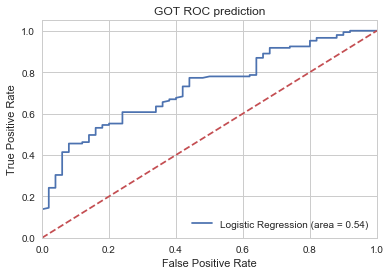

In [44]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GOT ROC prediction')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [45]:
logit_roc_auc

0.5427586206896552

In [46]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

print('LogisticRegression Accuracy：\n',lr.score(X_train, y_train))

LogisticRegression Accuracy：
 0.7664191890348372


In [47]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

print('RandomForest Accuracy：(original)\n',random_forest.score(X_train, y_train))

RandomForest Accuracy：(original)
 0.92175899486008


In [48]:
Dtree=DecisionTreeClassifier(max_depth = 5)

Dtree.fit(X_train,y_train)

print('DecisionTree Accuracy：(original)\n',Dtree.score(X_train, y_train))

DecisionTree Accuracy：(original)
 0.8121073672187321


In [49]:
svc = SVC()

svc.fit(X_train, y_train)

print('SVC Accuracy：\n',svc.score(X_train, y_train))

SVC Accuracy：
 0.770416904625928


In [50]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

print('kNN Accuracy：\n',knn.score(X_train, y_train))

kNN Accuracy：
 0.8537978298115363


In [51]:
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)

print('gaussian Accuracy：\n',gaussian.score(X_train, y_train))

gaussian Accuracy：
 0.757852655625357


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=508,learning_rate=0.1)
result=cross_val_score(grad,X_train,y_train,cv=3,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.7669857745329444


## Decisiontree 

In [53]:
import graphviz

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion = 'gini',
                                        random_state = 508,
                                        max_depth = 3,
                                        min_samples_leaf = 10)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=508,
            splitter='best')

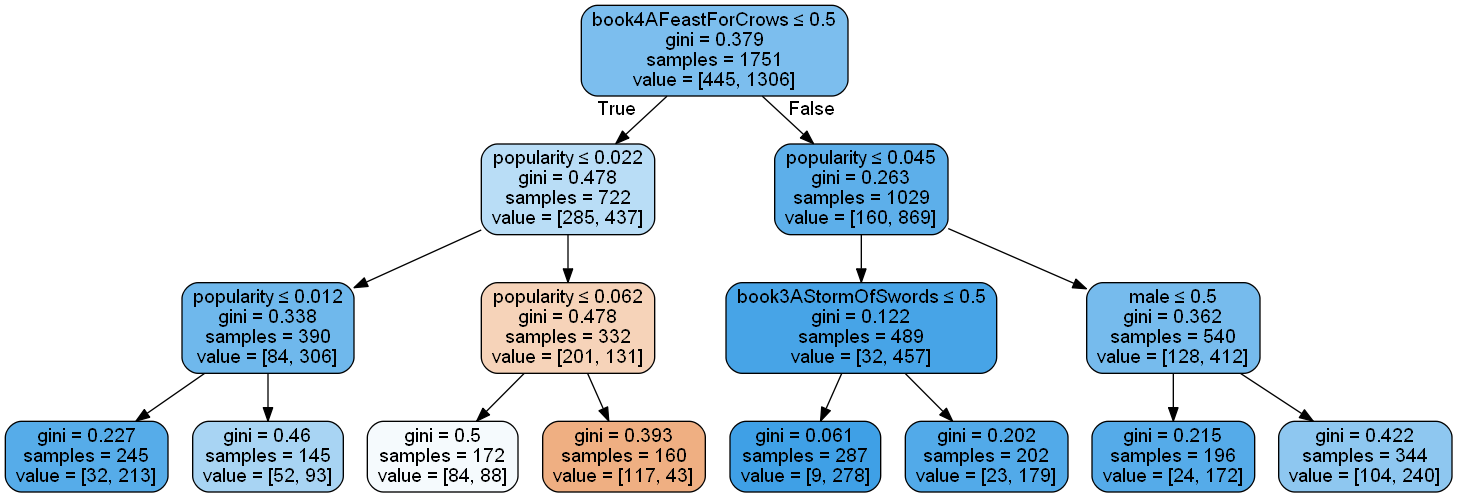

In [55]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Feature Importance

In [56]:
df2 = df.copy(deep=True)

In [57]:
x = df2.iloc[:,0:-1].values
y = df2.iloc[:,-1:].values

In [58]:
df2.drop(["isAlive"], inplace=True, axis=1)

In [59]:
rf_clf = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=508)

Text(0.5,1,'Random Forest Feature Importance')

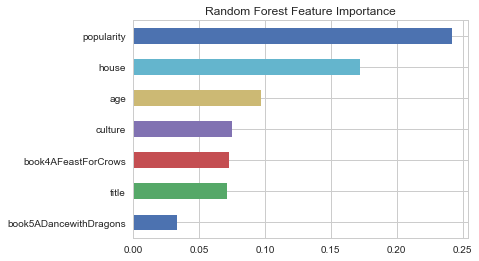

In [60]:

rf_clf.fit(x,y)

# Plot the 10 most important features
plt.figure()
pd.Series(rf_clf.feature_importances_, 
          df2.columns).sort_values(ascending=True)[15:].plot.barh(width=0.5,ax=plt.gca())
plt.gca().set_title('Random Forest Feature Importance')

In [61]:
model_predictions_df = pd.DataFrame({'Actual' : y_test,
                                     'RF_Predicted': rf_optimal_pred,
                                     'GBM_Predicted': gbm_optimal_pred})


model_predictions_df.to_excel("Ensemble_Model_Predictions.xlsx")